<div class='alert alert-info'>
<h2>Working with ChemBL data web api</h2>
</div>

---
ChEMBL Data Web Services Documentation is [here](https://chembl.gitbook.io/chembl-interface-documentation/web-services/chembl-data-web-services) and REST Api documentation is [here](https://www.ebi.ac.uk/chembl/api/data/docs). We will also be using the ChEMBL webresource client [GitHub page](https://github.com/chembl/chembl_webresource_client) in this notebook. This is the official Python client library of ChEMBL group.

In this notebook we will take the help of LUX widget ([GitHub page](https://github.com/lux-org/lux)) to generate suggestion for data visualization.
***    

<a name='toc'></a>
### Table of Contents

1. [Imports](#imports)
2. [Fetch data](#fetch_data)
3. [Save data](#save_data)
4. [Read data](#read_data)
5. [Exploratroy data analysis](#explore)
6. [PAINS structural alerts](#pains)

7. [Parse ChemBL activity](#activity)

---

<a name='imports'></a>
### Imports

In [1]:
# imports
import requests
import lux
import json
import pandas as pd
import urllib3
import certifi
from urllib3 import request
from chembl_webresource_client.new_client import new_client # ChemBL python api
http = urllib3.PoolManager(
       cert_reqs='CERT_REQUIRED',
       ca_certs=certifi.where())

### Define API Endpoints

In [ ]:
#url = "https://www.ebi.ac.uk/chembl/api/data/compound_structural_alert.json"
starting_url = 'https://www.ebi.ac.uk/chembl/api/data/compound_structural_alert.json?limit=10000&offset=1&_=1625851370881'
starting_url

<a name='fetch_data'></a>
### Fetch data
Using the pagination feature in ChEMBL web service (described [here](https://chembl.gitbook.io/chembl-interface-documentation/web-services/chembl-data-web-services#meta-data-and-pagination)) fetch all the compounds with structural alerts. 

<div class='alert alert-danger'>
<b>Please note that the following code block might take long time to finish execution, as it retrives all the compounds with one or more chemical alerts in them</b>
<br>    
</div>

For the purpose of exploring this note book, you might consider using a small subset of data provided inside `data` directory. Please continue from [Step 4](#read_data). 

In [ ]:
response = http.request('GET', starting_url)
data = json.loads(response.data.decode('utf-8'))
df = pd.json_normalize(data, record_path=['compound_structural_alerts'])
url_df = pd.json_normalize(data)
base = 'https://www.ebi.ac.uk'

next_url_exist = url_df['page_meta.next'][0]
print("Starting URL", starting_url)

while(next_url_exist):
    
    next_url = base + str(next_url_exist)
    response = http.request('GET', next_url)
    data = json.loads(response.data.decode('utf-8'))
    df_next = pd.json_normalize(data, record_path=['compound_structural_alerts'])
    next_url_df = pd.json_normalize(data)
    next_url_exist = next_url_df['page_meta.next'][0]
    df = df.append(df_next)
    print("shape of new df: ", df.shape)
    print ("Will use this url next: ", next_url)

In [ ]:
df

<a name='save_data'></a>
### Save the dataset

In [ ]:
df.info()
df.to_csv('data/chembl_structural_alerts.csv', sep=',', header=1)

<a name='read_data'></a>
### Read the dataset

A small subset of the dataset is available in `data` directory. 

In [2]:
# read the data
df = pd.read_csv('data/chembl_structural_alerts.csv')

##============================================================================================#
## Please remove the # from the following line if you would like to work with small dataset   #
##============================================================================================#
##df = pd.read_csv('data/chembl_structural_alerts_small.csv')

In [3]:
## Display a snippet of dataframe
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

***The LUX widget plot of alert set name Vs number of recored seems interesting let's export that and visualize here.*** 

<a name='explore'></a>
### Exploratory data analysis

***Questions:***

Let's count the number of unique values in each coloumn.  

In [4]:
df.nunique()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [5]:
df['alert.alert_set.set_name'].unique()

array(['Glaxo', 'Dundee', 'BMS', 'PAINS', 'MLSMR'], dtype='<U6')

In [6]:
df['alert.alert_set.set_name'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

***There are 5 unique alert set, namely BMS, Dundee, Glaxo, MLSMR, and PAINS***. 
Largest alert set in terms of number of compounds is MLSMR and smallest is PAINS. 

Let's plot some charts. First a bar plot of alert names and thier occurence count.

<AxesSubplot:>

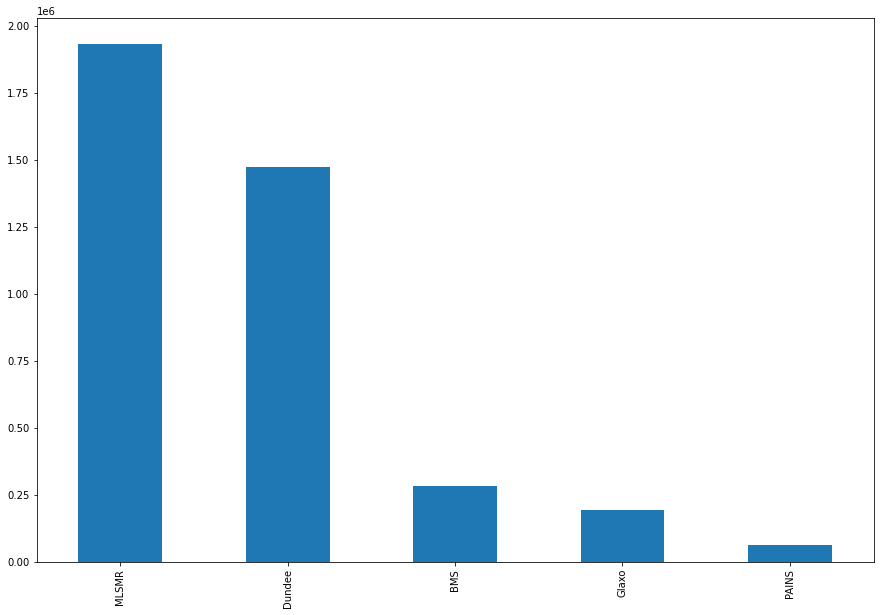

In [7]:
df['alert.alert_set.set_name'].value_counts().plot.bar(figsize=(15, 10))

Let's plot a pie chart

<AxesSubplot:ylabel='alert.alert_set.set_name'>

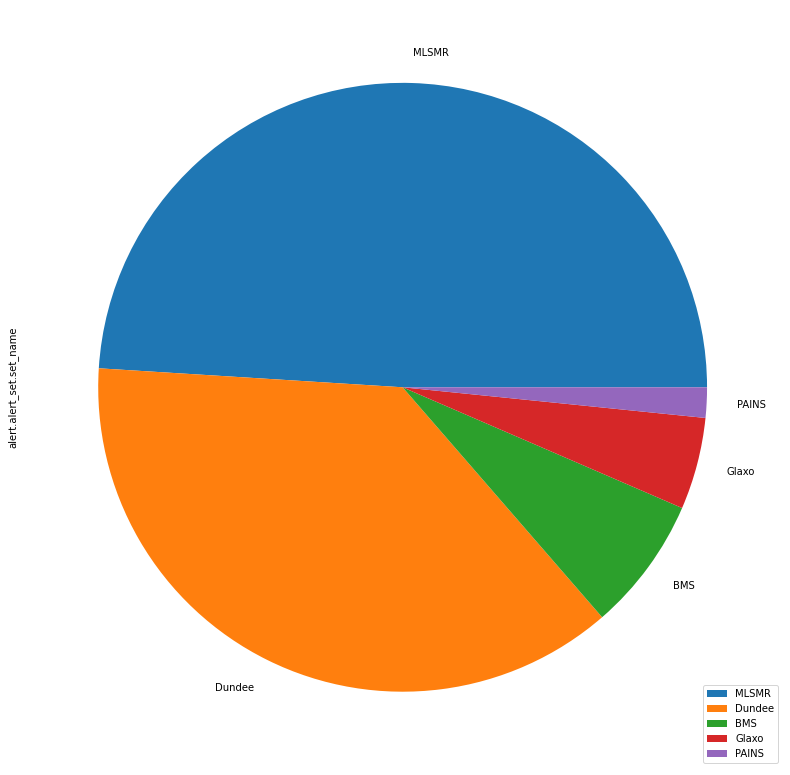

In [8]:
df['alert.alert_set.set_name'].value_counts().plot.pie(figsize=(18, 14), legend=True)

In [9]:
df['cpd_str_alert_id'].groupby(df['alert.alert_set.set_name']).describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

<a name='pains'></a>
### PAINS alert set

Let's now focus on PAINS

In [10]:
# select where the set_name is PAINS
df_pains = df[df["alert.alert_set.set_name"] == 'PAINS']
df_pains

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [20]:
df_pains['alert.alert_name'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

Let's plot the count of each alert name. 

<AxesSubplot:>

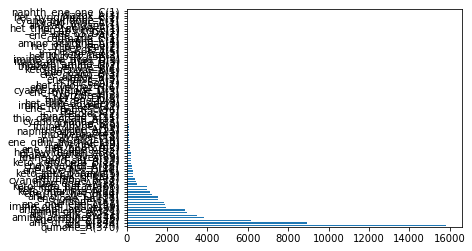

In [16]:
df_pains['alert.alert_name'].value_counts().plot(kind='barh')

Seems like the plot is quite crowded, let's plot only first 10 or 20 values. 

<AxesSubplot:>

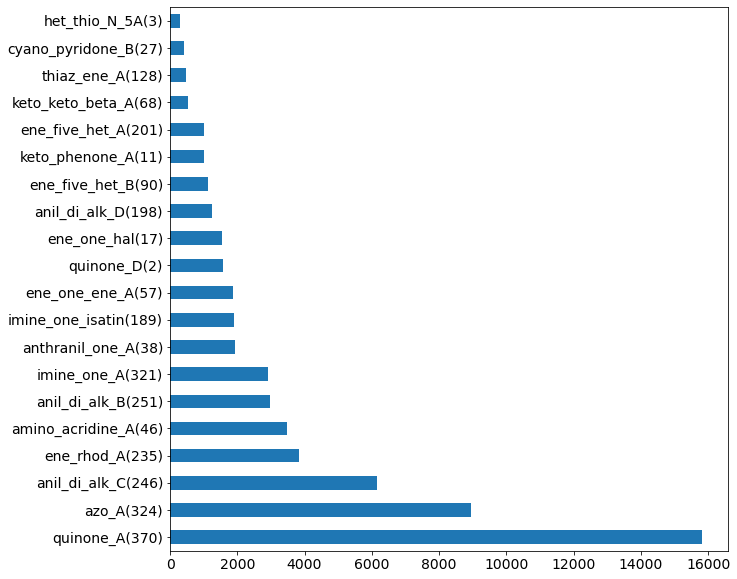

In [37]:
df_pains['alert.alert_name'].value_counts()[:20].plot(kind='barh', figsize=(10,10), fontsize=14)

In [ ]:
df_pains = pd.read_csv('chembl_PAINS.csv')
df_pains

In [ ]:
df_pains = pd.read_csv('chembl_PAINS.csv')

In [ ]:
data = json.loads(response.data.decode('utf-8'))
data

In [ ]:
print(json.dumps(parsed, indent=4))

In [ ]:
df = pd.json_normalize(data)
#df.head(10)

In [ ]:
base = 'https://www.ebi.ac.uk'
url = base + str(df['page_meta.next'][0])
url
    

In [ ]:
response = http.request('GET', url)

In [ ]:
response.status

In [ ]:
data = json.loads(response.data.decode('utf-8'))

In [ ]:
df_

<a name='activity'></a>
### Parse ChEMBL activity

In [3]:
starting_activity_url = '/chembl/api/data/activity.json?limit=1000&offset=1&_=18635916'
#https://www.ebi.ac.uk/chembl/api/data/compound_structural_alert.json?limit=10000&offset=1&_=1625851370881
base = 'https://www.ebi.ac.uk'
starting_activity_url = base + starting_activity_url
starting_activity_url

'https://www.ebi.ac.uk/chembl/api/data/activity.json?limit=1000&offset=1&_=18635916'

In [4]:
from utils.utils import fetch_chembl_data

In [5]:
df_activity = fetch_chembl_data(starting_activity_url, method='GET', record_path='activities')

Starting URL https://www.ebi.ac.uk/chembl/api/data/activity.json?limit=1000&offset=1&_=18635916
shape of new df:  (2000, 49)
Will use this url next:  https://www.ebi.ac.uk/chembl/api/data/activity.json?limit=1000&offset=1001&_=18635916
shape of new df:  (3000, 49)
Will use this url next:  https://www.ebi.ac.uk/chembl/api/data/activity.json?limit=1000&offset=2001&_=18635916


KeyboardInterrupt: 

In [42]:
print(response.status)

200


In [50]:
df_activity = pd.json_normalize(data, record_path='activities')
df_activity

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,type,units,uo_units,upper_value,value,ligand_efficiency.bei,ligand_efficiency.le,ligand_efficiency.lle,ligand_efficiency.sei,ligand_efficiency
0,None,31864,[],CHEMBL872937,In vivo inhibitory activity against human Hepa...,B,None,None,BAO_0000190,BAO_0000218,...,IC50,uM,UO_0000065,None,2.5,14.06,0.26,1.30,5.56,NaN
1,None,31865,[],CHEMBL693237,In vivo concentration required against angioge...,F,None,None,BAO_0000190,BAO_0000218,...,IC50,uM,UO_0000065,None,50.0,NaN,NaN,NaN,NaN,NaN
2,None,31866,[],CHEMBL872937,In vivo inhibitory activity against human Hepa...,B,None,None,BAO_0000190,BAO_0000218,...,IC50,uM,UO_0000065,None,9.0,9.69,0.18,-0.63,4.23,NaN
3,Not Determined,31867,[],CHEMBL693238,In vivo concentration required against angioge...,F,None,None,BAO_0000190,BAO_0000218,...,IC50,uM,None,None,None,NaN,NaN,NaN,NaN,NaN
4,None,31868,[],CHEMBL760688,Inhibitory activity against Palmitoyl-CoA oxid...,B,None,None,BAO_0000190,BAO_0000357,...,IC50,uM,UO_0000065,None,4.0,9.94,0.20,1.13,6.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,inactive at 100 uM and 1000 uM respectively,32859,[],CHEMBL701521,In vitro ability to inhibit the growth of L121...,F,None,None,BAO_0000375,BAO_0000219,...,Activity,None,None,None,None,NaN,NaN,NaN,NaN,NaN
996,inactive at 100 uM and 1000 uM respectively,32860,[],CHEMBL820906,In vitro ability to inhibit the growth of WI-L...,F,None,None,BAO_0000375,BAO_0000019,...,Activity,None,None,None,None,NaN,NaN,NaN,NaN,NaN
997,inactive at 100 uM and 1000 uM respectively,32861,[],CHEMBL652481,In vitro ability to inhibit the growth of CCRF...,F,None,None,BAO_0000375,BAO_0000219,...,Activity,None,None,None,None,NaN,NaN,NaN,NaN,NaN
998,inactive at 100 uM and 1000 uM respectively,32862,[],CHEMBL695774,In vitro antiviral activity against herpes sim...,F,None,None,BAO_0000375,BAO_0000218,...,Activity,None,None,None,None,NaN,NaN,NaN,NaN,NaN


0       CHEMBL324340
1       CHEMBL324340
2       CHEMBL109600
3       CHEMBL109600
4       CHEMBL357278
           ...      
995    CHEMBL3144016
996    CHEMBL3144016
997    CHEMBL3144016
998    CHEMBL3144016
999    CHEMBL3144016
Name: molecule_chembl_id, Length: 1000, dtype: object

In [44]:
data

{'activities': [{'activity_comment': None,
   'activity_id': 31864,
   'activity_properties': [],
   'assay_chembl_id': 'CHEMBL872937',
   'assay_description': 'In vivo inhibitory activity against human Heparanase',
   'assay_type': 'B',
   'assay_variant_accession': None,
   'assay_variant_mutation': None,
   'bao_endpoint': 'BAO_0000190',
   'bao_format': 'BAO_0000218',
   'bao_label': 'organism-based format',
   'canonical_smiles': 'Cc1ccc2oc(-c3cccc(N4C(=O)c5ccc(C(=O)O)cc5C4=O)c3)nc2c1',
   'data_validity_comment': None,
   'data_validity_description': None,
   'document_chembl_id': 'CHEMBL1146658',
   'document_journal': 'Bioorg. Med. Chem. Lett.',
   'document_year': 2004,
   'ligand_efficiency': {'bei': '14.06',
    'le': '0.26',
    'lle': '1.30',
    'sei': '5.56'},
   'molecule_chembl_id': 'CHEMBL324340',
   'molecule_pref_name': None,
   'parent_molecule_chembl_id': 'CHEMBL324340',
   'pchembl_value': '5.60',
   'potential_duplicate': True,
   'qudt_units': 'http://www.openp

In [45]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,type,units,uo_units,upper_value,value,ligand_efficiency.bei,ligand_efficiency.le,ligand_efficiency.lle,ligand_efficiency.sei,ligand_efficiency
0,None,31864,[],CHEMBL872937,In vivo inhibitory activity against human Hepa...,B,None,None,BAO_0000190,BAO_0000218,...,IC50,uM,UO_0000065,None,2.5,14.06,0.26,1.30,5.56,NaN
1,None,31865,[],CHEMBL693237,In vivo concentration required against angioge...,F,None,None,BAO_0000190,BAO_0000218,...,IC50,uM,UO_0000065,None,50.0,NaN,NaN,NaN,NaN,NaN
2,None,31866,[],CHEMBL872937,In vivo inhibitory activity against human Hepa...,B,None,None,BAO_0000190,BAO_0000218,...,IC50,uM,UO_0000065,None,9.0,9.69,0.18,-0.63,4.23,NaN
3,Not Determined,31867,[],CHEMBL693238,In vivo concentration required against angioge...,F,None,None,BAO_0000190,BAO_0000218,...,IC50,uM,None,None,None,NaN,NaN,NaN,NaN,NaN
4,None,31868,[],CHEMBL760688,Inhibitory activity against Palmitoyl-CoA oxid...,B,None,None,BAO_0000190,BAO_0000357,...,IC50,uM,UO_0000065,None,4.0,9.94,0.20,1.13,6.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,inactive at 100 uM and 1000 uM respectively,32859,[],CHEMBL701521,In vitro ability to inhibit the growth of L121...,F,None,None,BAO_0000375,BAO_0000219,...,Activity,None,None,None,None,NaN,NaN,NaN,NaN,NaN
996,inactive at 100 uM and 1000 uM respectively,32860,[],CHEMBL820906,In vitro ability to inhibit the growth of WI-L...,F,None,None,BAO_0000375,BAO_0000019,...,Activity,None,None,None,None,NaN,NaN,NaN,NaN,NaN
997,inactive at 100 uM and 1000 uM respectively,32861,[],CHEMBL652481,In vitro ability to inhibit the growth of CCRF...,F,None,None,BAO_0000375,BAO_0000219,...,Activity,None,None,None,None,NaN,NaN,NaN,NaN,NaN
998,inactive at 100 uM and 1000 uM respectively,32862,[],CHEMBL695774,In vitro antiviral activity against herpes sim...,F,None,None,BAO_0000375,BAO_0000218,...,Activity,None,None,None,None,NaN,NaN,NaN,NaN,NaN


In [ ]:
from chembl_webresource_client.new_client import new_client
activities = new_client.activity
res = activities.filter(molecule_chembl_id="CHEMBL25", pchembl_value__isnull=False)

In [ ]:
res = pd.json_normalize(res)
res